<a href="https://colab.research.google.com/github/ipediz/BachehayekhafaneTMU/blob/main/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This code was mostly written with the aid of ChatGPT**

In [ ]:
!pip install ISLP
!pip install latex
!pip install pytablewriter
!pip install pylatex
import pandas as pd
import ISLP
import numpy as np
import tabulate
import latex as la
import pytablewriter as py
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=db25c334411ce027c86cc766b6472ed38789897a4008bca716aaf45c708db41d
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=21f4e45ecaf500594769ecf115d7ef11571b40731609b60ec082cae6b9793037
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=c86c587e61808805f8e11c524c7bf132dfa289053f6e2cdc8d0d5d3c814e7e90
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e018891505911e82a6f358a0291e7681bae
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.w

In [ ]:
Data = pd.read_csv("The_new_all_state_replication_data.csv")
Data['interaction'] = Data['interaction'] / 100
Data['percent_over_60'] = Data['percent_over_60'] / 100
# setting 'county_code' as index and 'new_timeperiod' as time
Data = Data.set_index(['county_code', 'new_timeperiod'])



In [ ]:
from tabulate import tabulate
#dropping non-relative variables for summary statistics table
columns_to_drop = [
    'relative_time_m8andbeyond', 'relative_time_m7', 'relative_time_m6', 'relative_time_m5',
    'relative_time_m4', 'relative_time_m3', 'relative_time_m2', 'relative_time_m1', 'relative_time_0',
    'relative_time_p1', 'relative_time_p2', 'relative_time_p3', 'relative_time_p4',
    'relative_time_p5', 'relative_time_p6', 'relative_time_p7', 'relative_time_p8andbeyond',
    'cem_strata', 'cem_weights'
]

# Create a new dataframe without the specified columns
Data1 = Data.drop(columns=columns_to_drop)

In [ ]:
# Generate summary statistics for all numerical columns

Data1_Summary_Statistics = Data1.describe()

# Convert the summary statistics DataFrame to a format that tabulate can handle
table = tabulate(Data1_Summary_Statistics, headers=Data1_Summary_Statistics.columns, tablefmt='fancy_grid')

# Print the beautiful table
print(table)

╒═══════╤══════════════════════════╤═════════════════════════╤══════════════════╤═════════════════════════╤════════════════════════╤════════════════════╤═══════════════╤═════════════════════════╤════════════════════════════════════╤═════════════════════════════════╤═══════════════════╤═══════════════╕
│       │   lending_club_available │   bankruptcy_per_capita │   log_bankruptcy │   population_estimation │   employed_individuals │   monthly_earnings │   labor_force │   medianhouseholdincome │   nonbusiness_bankruptcy_percapita │   business_bankruptcy_percapita │   percent_over_60 │   interaction │
╞═══════╪══════════════════════════╪═════════════════════════╪══════════════════╪═════════════════════════╪════════════════════════╪════════════════════╪═══════════════╪═════════════════════════╪════════════════════════════════════╪═════════════════════════════════╪═══════════════════╪═══════════════╡
│ count │             64652        │            64652        │      64652       │          

In [ ]:
Data1_Summary_Statistics = Data1.describe()

# Convert the summary statistics DataFrame to a format that tabulate can handle
# Convert the DataFrame to a list of lists, including the column names as headers
table = tabulate(Data1_Summary_Statistics, headers=Data1_Summary_Statistics.columns, tablefmt='latex')

# Print the LaTeX formatted table
print(table)

\begin{tabular}{lrrrrrrrrrrrr}
\hline
       &   lending\_club\_available &   bankruptcy\_per\_capita &   log\_bankruptcy &   population\_estimation &   employed\_individuals &   monthly\_earnings &   labor\_force &   medianhouseholdincome &   nonbusiness\_bankruptcy\_percapita &   business\_bankruptcy\_percapita &   percent\_over\_60 &   interaction \\
\hline
 count &             64652        &            64652        &      64652       &              64652      &             64630      &       64630        &    64612      &              64640      &                       64652        &                     64544       &      64484        &  64484        \\
 mean  &                 0.692848 &                0.652656 &          2.76661 &                 55.9447 &                18.6419 &           3.00744  &       27.6072 &                 44.7482 &                           0.628244 &                         1.06321 &          0.246874 &      0.177156 \\
 std   &                 0.4613

In [ ]:
Data1 = Data1.dropna();
columns_to_drop = [
    'nonbusiness_bankruptcy_percapita','business_bankruptcy_percapita', 'log_bankruptcy' ]

# Create a new dataframe without the specified columns
Data1_tree= Data1.drop(columns=columns_to_drop)

In [ ]:
model = MS(Data1_tree.columns.drop('bankruptcy_per_capita'), intercept=False)

# Fit and transform the model
D = model.fit_transform(Data1_tree)

# Extract feature names
feature_names = list(D.columns)

# Convert to NumPy array
X = np.asarray(D)

In [ ]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Data1_tree['bankruptcy_per_capita'],
                                test_size=0.3,
                                random_state=0)

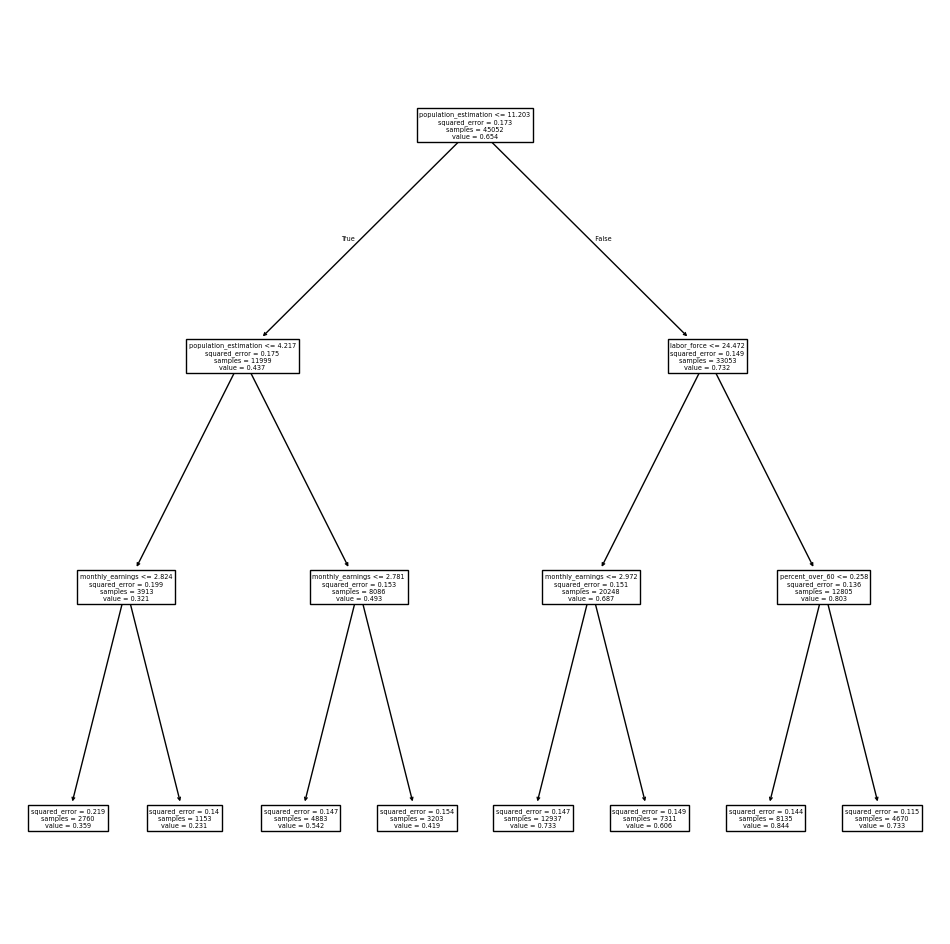

In [ ]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

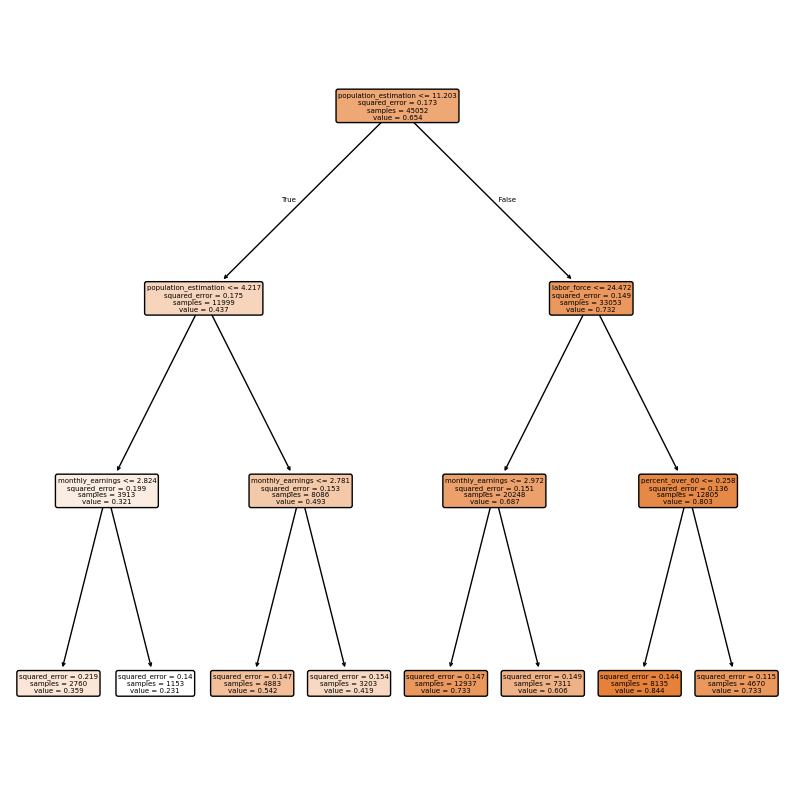

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))  # Increased figure size
plot_tree(
    reg,
    feature_names=feature_names,   # Use feature names
    filled=True,                   # Color the nodes for better clarity
    fontsize=5,                   # Further increased font size
    rounded=True,                  # Rounded boxes for better visual presentation
    ax=ax
)

# Save the plot as a high-resolution PDF file
plt.savefig('decision_tree_plot1.pdf', dpi=1000)  # Higher DPI for better resolution
plt.show()

In [ ]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)


Bagging Regression Tree

In [ ]:
bag_df = RF(max_features=X_train.shape[1], random_state=0)
bag_df.fit(X_train, y_train)

RandomForestRegressor(max_features=8, random_state=0)

0.08103212071624442

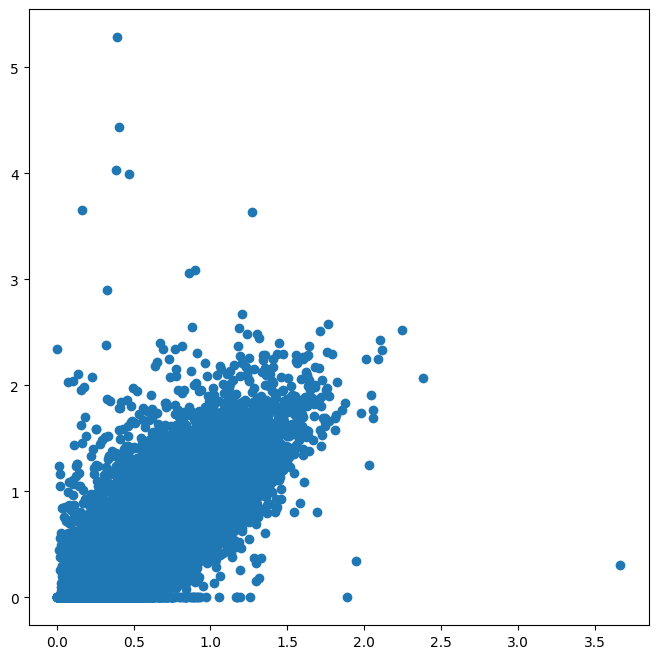

In [ ]:
ax = subplots(figsize=(4,4))[1]
y_hat_bag = bag_df.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test - y_hat_bag)**2)

MSE of Random Forrest Approach with Max co-variates to chose from = 5


In [ ]:
RF_df = RF(max_features=5,
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_df.predict(X_test)
np.mean((y_test - y_hat_RF)**2)


0.07948981732319638

In [ ]:
feature_imp = pd.DataFrame(
    {'importance':RF_df.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
population_estimation,0.195121
employed_individuals,0.183615
labor_force,0.164207
monthly_earnings,0.149370
medianhouseholdincome,0.127069
percent_over_60,0.105156
interaction,0.067656
lending_club_available,0.007806


Printin Latex Output


In [ ]:
!pip install pylatex
from pylatex import Document, Section, Subsection, Tabular, NoEscape


# Sample DataFrame
feature_imp = pd.DataFrame(
    {'importance': [0.195121, 0.183615, 0.164207, 0.149370, 0.127069, 0.105156, 0.067656, 0.007806]},
    index=['population_estimation', 'employed_individuals', 'labor_force', 'monthly_earnings',
           'medianhouseholdincome', 'percent_over_60', 'interaction', 'lending_club_available']
)

# Create a new LaTeX document
doc = Document()

with doc.create(Section('Feature Importance')):
    with doc.create(Tabular('|l|r|')) as table:
        # Add table headers
        table.add_hline()
        table.add_row(('Feature', 'Importance'))
        table.add_hline()

        # Loop over the DataFrame to add rows
        for feature, importance in feature_imp.iterrows():
            table.add_row((feature, f'{importance[0]:.6f}'))
        table.add_hline()

# Generate the LaTeX code
doc.generate_tex('feature_importance_table')

# Alternatively, to directly preview LaTeX code in Python
print(doc.dumps())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pylatex: filename=PyLaTeX-1.4.2-py3-none-any.whl size=43558 sha256=1d044c0244c5ff7a556dd77eec84f1ec41c1915d8a048bd70923b4c34e0e2547
  Stored in directory: /root/.cache/pip/wheels/a3/60/09/c6f9f98feac18da1b5fc02bd765c6b3cb9a0f75955a12b27ad
Successfully built pylatex
\documentclass{article}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
%
%
\begin{document}%
\normalsize%
\section{Feature Importance}%
\label{sec:FeatureImportance}%
\begin{tabular}{|l|r|}%
\hline%
Feature&Importance\\%
\hline%
population\_estimation&0.195121\\%
employed\_individuals&0.183615\\%
labor\_force&0.164207\\%
monthly\_earnings&0.149370\\%
medianhouseholdincome&0.127069\\%
percent\_over\_60&0.105156\\%
int

<ipython-input-35-7833d96e45f5>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  table.add_row((feature, f'{importance[0]:.6f}'))


Gradient Boosting


In [ ]:
df_df = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
df_df.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

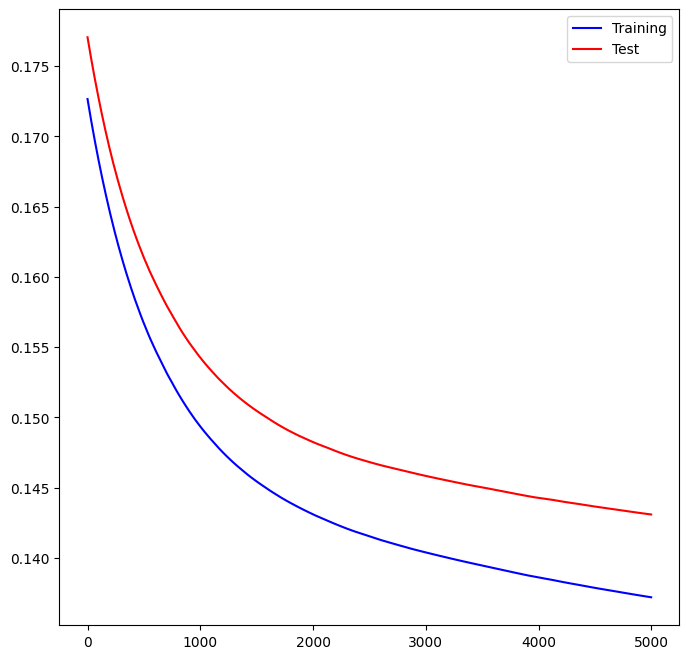

In [ ]:
test_error = np.zeros_like(df_df.train_score_)
for idx, y_ in enumerate(df_df.staged_predict(X_test)):
   test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(df_df.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        df_df.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
plt.savefig('Gradient_Boosting_Training_Test_Error_Plot.pdf', dpi=300)  # Save as PNG
ax.legend();


In [ ]:
y_hat_boost = df_df.predict(X_test);
np.mean((y_test - y_hat_boost)**2)


0.14308580650301453

In [ ]:
df_df = GBR(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=0)
df_df.fit(X_train,
                 y_train)
y_hat_boost = df_df.predict(X_test);
np.mean((y_test - y_hat_boost)**2)


0.09159117242406131

In [ ]:
df_df = BART(random_state=0, burnin=5, ndraw=15)
df_df.fit(X_train, y_train)


BART(burnin=5, ndraw=15, random_state=0)

In [ ]:
yhat_test = df_df.predict(X_test.astype(np.float32))
np.mean((y_test - yhat_test)**2)


0.14301834053937235

In [ ]:
var_inclusion = pd.Series(df_df.variable_inclusion_.mean(0),
                               index=D.columns)
var_inclusion


,0
lending_club_available,29.733333
population_estimation,48.333333
employed_individuals,46.533333
monthly_earnings,40.000000
labor_force,47.066667
medianhouseholdincome,30.066667
percent_over_60,28.733333
interaction,30.266667


In [ ]:
# Generate a DataFrame to store variable inclusion values
var_inclusion = pd.Series(
    df_df.variable_inclusion_.mean(0),
    index=D.columns
)

# Convert the DataFrame to LaTeX code
latex_code = var_inclusion.to_latex(
    header=["Inclusion Frequency"],  # Column header
    index_names=["Feature"],         # Row index name
    float_format="%.2f"              # Format numbers with two decimal places
)

print(latex_code)  # Output the LaTeX code


\begin{tabular}{lr}
\toprule
 & Inclusion Frequency \\
\midrule
lending_club_available & 29.73 \\
population_estimation & 48.33 \\
employed_individuals & 46.53 \\
monthly_earnings & 40.00 \\
labor_force & 47.07 \\
medianhouseholdincome & 30.07 \\
percent_over_60 & 28.73 \\
interaction & 30.27 \\
\bottomrule
\end{tabular}



In [ ]:
from sklearn.metrics import mean_squared_error


mse_rf = np.mean((y_test - y_hat_RF)**2)
mse_bagging = np.mean((y_test - y_hat_bag)**2)
mse_boosting = np.mean((y_test - y_hat_boost)**2)


rmse_rf = np.sqrt(mse_rf)
rmse_bagging = np.sqrt(mse_bagging)
rmse_boosting = np.sqrt(mse_boosting)

error_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'Gradient Boosting'],
    'MSE': [mse_rf, mse_bagging, mse_boosting],
    'RMSE': [rmse_rf, rmse_bagging, rmse_boosting]
})
latex_code = error_metrics.to_latex(index=False,
                                    float_format="%.4f",  # Format numbers to 4 decimal places
                                    caption="Error Metrics for Different Models",
                                    label="tab:error_metrics")

# Print the LaTeX code
print(latex_code)
print(error_metrics)

\begin{table}
\caption{Error Metrics for Different Models}
\label{tab:error_metrics}
\begin{tabular}{lrr}
\toprule
Model & MSE & RMSE \\
\midrule
Random Forest & 0.0795 & 0.2819 \\
Bagging & 0.0810 & 0.2847 \\
Gradient Boosting & 0.0916 & 0.3026 \\
\bottomrule
\end{tabular}
\end{table}

               Model       MSE      RMSE
0      Random Forest  0.079490  0.281939
1            Bagging  0.081032  0.284661
2  Gradient Boosting  0.091591  0.302640
